# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Fourth Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 31 October 2017</span>


### Topics to be discussed 

* Linear Transformations
* PCA
* Extensions to PCA


In [360]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
%matplotlib inline

## Some Basic notions in Linear Algebra

### A vector (or a point in n dimensional space)

In [374]:
x =  np.asarray([[2,2]])
x.shape

(1, 2)

(0, 3)

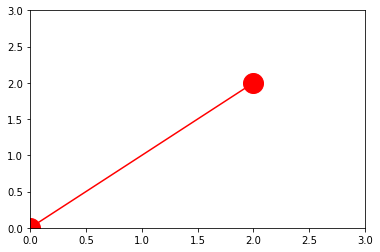

In [375]:
plt.plot([0,x[0,0]],[0,x[0,1]],'-or',markersize=20)

plt.xlim(0,3)
plt.ylim(0,3)

# Matrix Operation

##  $$y =xA $$
### $$ x - > (1xn) $$
### $$ y - > (1xm) $$
### $$ A - > (nxm) $$

### Matrices are acting as linear operator, moving every point from one location to another location


### We can write it like this too
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f32d668cc6edb290dc42e8e00db30dda68c1e29)

<a></a>



### Special Linear transformers
more examples: https://en.wikipedia.org/wiki/Linear_map#Examples_of_linear_transformation_matrices

In [376]:
#rotation 90 degrees
A =np.asarray([[0,-1],[1,0]])
print(np.matrix(A)) 
y = x.dot(A)
y.shape

[[ 0 -1]
 [ 1  0]]


(1, 2)

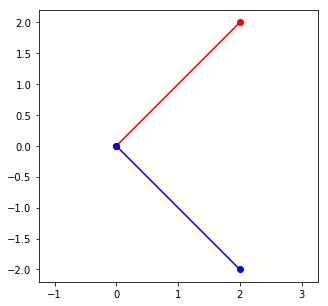

In [377]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

In [378]:
#rotation t degrees
t = np.pi/4.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])

y = x.dot(A)
x.shape

(1, 2)

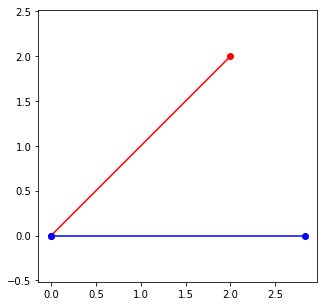

In [379]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

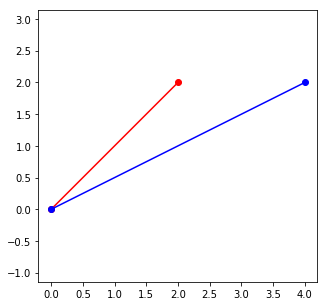

In [371]:

A =np.asarray([[1,1],[1,0]])

y = x.dot(A)
y.shape


fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

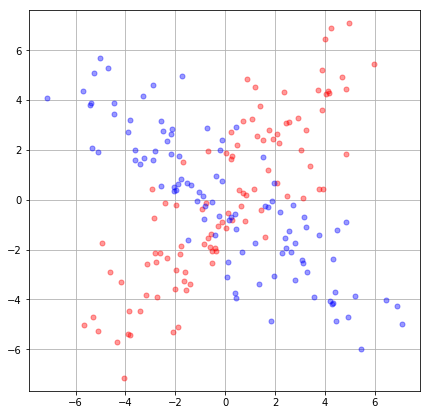

In [380]:
#rotation t degrees
t = 1*np.pi/2.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])


N = 100
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=0,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=0.0, scale=1.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)

Y = X.dot(A)

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );


ax1= plt.subplot(111)
plt.plot(Y[:,0],Y[:,1],'.b',markersize=10,alpha=.4 );


plt.grid();
plt.axis('equal');



# Some known Linear Operators (transformation matrix)
## Usually when we repeatedly use the transformation like in series

### Fiboonatchi series

$$ x_0 = 0 $$
$$ x_1 = 1 $$
$$ xtp_2 = xtp_1 + xt $$




In [381]:
xtp_1=1
xt = 0 
for i in range(10):
    xtp_2 =  xtp_1 + xt
    xt = xtp_1
    xtp_1 = xtp_2
    print xtp_2

1
2
3
5
8
13
21
34
55
89


# In Matrix Form

If we write down these two equations:
    $$ xtp_2 = xtp_1 + xt $$
    $$xtp_1 = xtp_1$$

Then, we have a system of equation as follows

$$[xtp_2, xtp_1] = [xtp_1, xt][[1,1],[1,0]]$$



In [382]:
F =np.asarray([[1,1],[1,0]])
print(np.matrix(F)) 

[[1 1]
 [1 0]]


In [383]:
xtp_1=1
xt = 0
X = np.asarray([xtp_1,xt])
for i in range(10):
    X = X.dot(F)
    print X[0],X[1]

1 1
2 1
3 2
5 3
8 5
13 8
21 13
34 21
55 34
89 55


# Markov Chians

### x = x.dot(M)
### Where M has a certain condition 

In [13]:
M =np.asarray([[.9,.1],[.5,.5]])

print(np.matrix(M)) 
print 
x = np.asarray([0,1])
print x
for i in range(20):
    x = x.dot(M)
    print x
print x

[[ 0.9  0.1]
 [ 0.5  0.5]]

[0 1]
[ 0.5  0.5]
[ 0.7  0.3]
[ 0.78  0.22]
[ 0.812  0.188]
[ 0.8248  0.1752]
[ 0.82992  0.17008]
[ 0.831968  0.168032]
[ 0.8327872  0.1672128]
[ 0.83311488  0.16688512]
[ 0.83324595  0.16675405]
[ 0.83329838  0.16670162]
[ 0.83331935  0.16668065]
[ 0.83332774  0.16667226]
[ 0.8333311  0.1666689]
[ 0.83333244  0.16666756]
[ 0.83333298  0.16666702]
[ 0.83333319  0.16666681]
[ 0.83333328  0.16666672]
[ 0.83333331  0.16666669]
[ 0.83333332  0.16666668]
[ 0.83333332  0.16666668]


# Let's go back to Data Driven models and Machine Learning

### where we are interested to find certain Matrices
### While in the previous examples, we have a matrix and then, want to see how the system will behave.

### But in machine learning we are usually interested in designing or learning certain operators

## Principal component analysis (PCA)
## The basic idea: 
### we have observed  $ x $ 
## Is it possible to to find a transformation, where in the new space the new dimensions are uncorrelated? 

## $$ x = yP $$
##  $$x = \sum_{i = 1}^n a_i. p_i$$

## $p_i$ is an n dimensional column vector. 



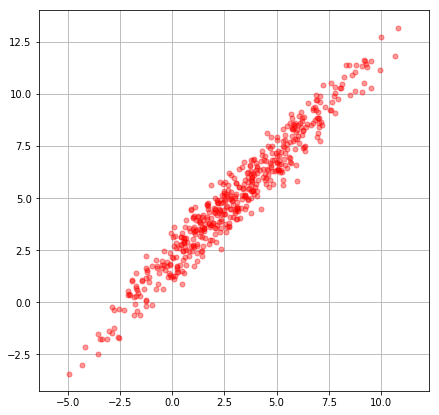

In [385]:
N = 500
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=3,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=2.0, scale=0.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)



fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

In [387]:
np.cov(X.T)

array([[ 8.66835064,  8.5973591 ],
       [ 8.5973591 ,  8.99256221]])

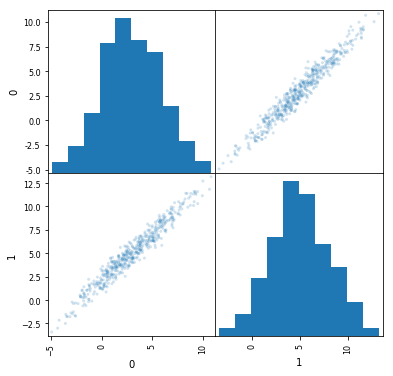

In [386]:
# look how dependent are the two original dimensions 
# X_trans = X.dot(PCs[:,:5])
DF = pd.DataFrame(data=X)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

In [388]:
# Normalizing it around 0
X_w = X-np.mean(X,axis=0)

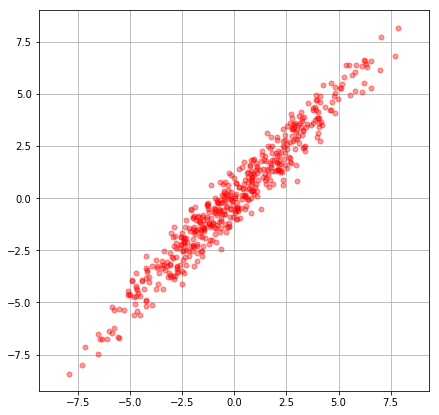

In [389]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

In [390]:
# We estimate the Covariance matrix as below:
XTX = X_w.T.dot(X_w)/(X_w.shape[0]-1)
np.around(XTX,decimals=3)

array([[ 8.668,  8.597],
       [ 8.597,  8.993]])

In [46]:
## Using numpy on X
COVX = np.cov(X.T)
np.around(COVX,decimals=3)

array([[  9.779,   9.429],
       [  9.429,  10.562]])

In [392]:
# if we calculate the eigenvectors of the covariance matrix, they are the requested operator in PCA
VARs,PCs = np.linalg.eig(XTX)
# VARs,PCs = np.linalg.eig(np.cov(X.T))
indsort = np.argsort(VARs*-1,)
PCs = PCs[:,indsort]
VARs = VARs[indsort]
VARs = VARs/np.sum(VARs)
print np.sum(VARs)

1.0


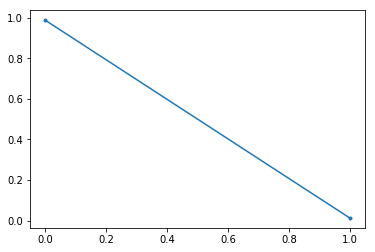

In [393]:
plt.plot(VARs,'.-')

In [394]:
PCs

array([[-0.7004099 , -0.71374083],
       [-0.71374083,  0.7004099 ]])

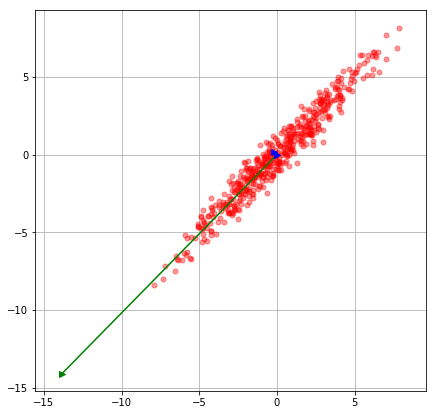

In [395]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot([0,PCs[0,0]*VARs[0]*20],[0,PCs[1,0]*VARs[0]*20],'->g')
plt.plot([0,PCs[0,1]*VARs[1]*20],[0,PCs[1,1]*VARs[1]*20],'->b')
plt.grid();
plt.axis('equal');

In [396]:
VARs = VARs/np.sum(VARs)
VARs

array([ 0.98688804,  0.01311196])

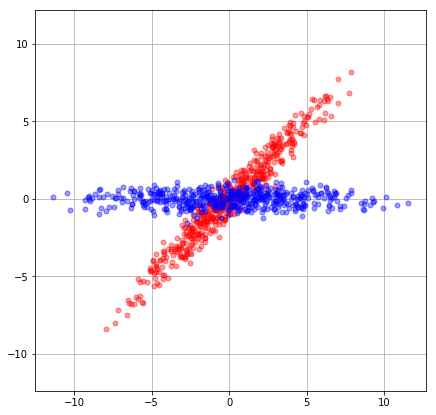

In [397]:
fig = plt.figure(figsize=(7,7))
X_trans = X_w.dot(PCs[:])
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

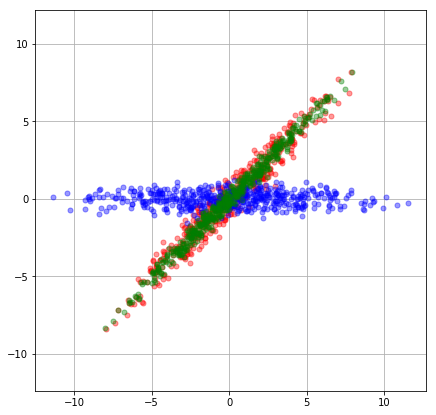

In [400]:

fig = plt.figure(figsize=(7,7))



X_trans = X_w.dot(PCs[:])


plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );


# Parametric transformation
X_ =   X_trans.dot(([1,0.5]*PCs).T)

plt.plot(X_ [:,0],X_ [:,1],'.g',markersize=10,alpha=.4 );

plt.grid();
plt.axis('equal');

In [373]:
# # Now if we just use one of the P components
# X_trans = X_w.dot(PCs[:,0])
# plt.plot(X_trans,'.r',markersize=10,alpha=.4 );

# X_trans = X_w.dot(PCs[:,1])
# plt.plot(X_trans,'.b',markersize=10,alpha=.4 );


### Now testing the original idea of PCA

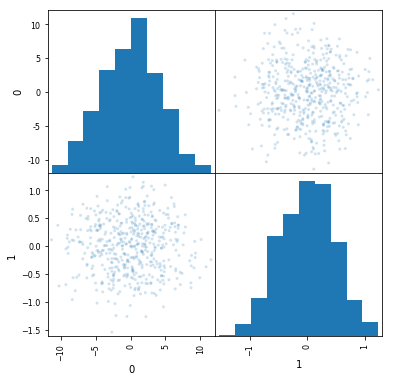

In [401]:
# look how uncorrelated they are 
X_trans = X_w.dot(PCs)
DF = pd.DataFrame(data=X_trans)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

In [84]:
# This shows the orthogonality
XtrsnTXtrsn = X_trans.T.dot(X_trans)/(X_trans.shape[0]-1)
np.around(XtrsnTXtrsn,decimals=3)

array([[ 19.608,  -0.   ],
       [ -0.   ,   0.733]])

# What is this good for?
### Dimensionality reduction and feature extraction -- > To reduce the curse of dimensionality for prediction problems
### Data Compression
### Generative space

# PCA + Regression/Classification


### If initial features are correlated, this method helps a lot. 
### However, if the intial features are not homogenous (like the case in image data), we should not expect a lot!

### 1- Regression example with Heterogeneous data set

In [402]:
path = './Images/rentalprice.csv'
rental = pd.read_csv(path)
rental.head()

,Rent,ZIP,Type_Apartment,Type_Duplex,Type_Single house,Type_Studio,Rooms,Year built,Living space,lng,lat
0,645.0,5000,1.0,0.0,0.0,0.0,1.0,1954.0,28.0,8.041672,47.397999
1,1340.0,5000,1.0,0.0,0.0,0.0,4.0,1971.0,88.0,8.057444,47.379288
2,1380.0,5000,1.0,0.0,0.0,0.0,3.0,1968.0,69.0,8.057165,47.378022
3,1480.0,5000,1.0,0.0,0.0,0.0,3.5,1976.0,81.0,8.057974,47.400780
4,1500.0,5000,1.0,0.0,0.0,0.0,4.0,1968.0,80.0,8.057165,47.378022


In [403]:
# To separate training and testing data from each other
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import random
Target = 0

#Data Selection
Mat_all = rental.ix[:,:].copy()


a = range(Mat_all.shape[1])
ind_col = a !=np.tile(Target,(len(a)))
Tr_data_size = int(.6*Mat_all.shape[0])
print Tr_data_size
ind_row_train = random.sample(range(Mat_all.shape[0]),Tr_data_size)
ind_row_test = range(Mat_all.shape[0])
for i in ind_row_train:
    ind_row_test.remove(i)
print len(ind_row_test)


#This is fixed always
y_tr = Mat_all.values[ind_row_train].astype(float)
y_tr= y_tr[:,Target].astype(float)

y_ts = Mat_all.values[ind_row_test].astype(float)
y_ts = y_ts[:,Target].astype(float)



X_tr = Mat_all.values[ind_row_train].astype(float) 
X_tr = X_tr[:,ind_col].astype(float) 
            
std = X_tr.std(axis=0)
randomization = 1e-25*np.random.randn(X_tr.shape[0],1)
ind_std0 = std==0
X_tr[:,ind_std0] = X_tr[:,ind_std0] + randomization 
            
X_ts = Mat_all.values[ind_row_test].astype(float)
X_ts = X_ts[:,ind_col].astype(float)

12599
8400


In [404]:
import time
y_preds_tr = pd.DataFrame(data=np.zeros((y_tr.shape[0],0)))
ARE_tr = pd.DataFrame(data=np.zeros((y_tr.shape[0],0)))
MAE_tr = pd.DataFrame(data=np.zeros((1,0)))

y_preds_ts = pd.DataFrame(data=np.zeros((y_ts.shape[0],0)))
ARE_ts = pd.DataFrame(data=np.zeros((y_ts.shape[0],0)))
MAE_ts = pd.DataFrame(data=np.zeros((1,0)))

training_times = []
max_degree = 5
for degree in range(1,max_degree):   
    poly = PolynomialFeatures(degree=degree)
    X_tr_ = poly.fit_transform(X_tr)
    X_ts_ = poly.fit_transform(X_ts)
    
    t0 = time.time()
    regr = linear_model.LinearRegression()
    regr.fit(X_tr_, y_tr)
    
    print 'dimension of training data for polynomial degree {} is {}'.format(degree,X_tr_.shape[1])
    training_times.append(time.time()-t0)
    print 'degree {} is done in {} seconds'.format(degree,time.time()-t0)
    
    y_pred_tr = regr.predict(X_tr_)[:]
    y_pred_ts = regr.predict(X_ts_)[:]
    
    
    y_preds_tr['degree-{}'.format(degree)] = y_pred_tr
    MAE_tr['degree-{}'.format(degree)] = np.mean(np.abs(y_pred_tr-y_tr))
    ARE_tr['degree-{}'.format(degree)] = 100*np.abs(y_pred_tr-y_tr)/y_tr
    
    
    y_preds_ts['degree-{}'.format(degree)] = y_pred_ts
    MAE_ts['degree-{}'.format(degree)] = np.mean(np.abs(y_pred_ts-y_ts))
    ARE_ts['degree-{}'.format(degree)] = 100*np.abs(y_pred_ts-y_ts)/y_ts

# plt.plot(range(1,max_degree),training_times)
# plt.xlabel('polynomials degree')
# plt.ylabel('training time')


dimension of training data for polynomial degree 1 is 11
degree 1 is done in 0.00376009941101 seconds
dimension of training data for polynomial degree 2 is 66
degree 2 is done in 0.0328750610352 seconds
dimension of training data for polynomial degree 3 is 286
degree 3 is done in 0.222550153732 seconds
dimension of training data for polynomial degree 4 is 1001
degree 4 is done in 5.7112390995 seconds


In [405]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ARE_ts.shape[1])),index=quality,columns=ARE_ts.columns)
for percent in quality:
    for m in range(ARE_ts.shape[1]):
        a = np.abs(ARE_ts.values[:,m])
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
percentiles
med_error = pd.DataFrame(data=np.median(np.abs(ARE_ts.values[:]),axis=0)[np.newaxis,:],columns=ARE_ts.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.T

,median,1,5,10,15,20
degree-1,13.859524,3.904762,19.309524,37.773810,53.190476,64.642857
degree-2,13.461966,4.690476,21.059524,38.880952,54.690476,66.392857
degree-3,12.415782,4.297619,22.285714,41.630952,57.773810,69.821429
degree-4,11.556824,4.785714,23.440476,44.785714,60.785714,72.595238


In [406]:
import time
import sklearn.decomposition as decomp 
y_preds_tr = pd.DataFrame(data=np.zeros((y_tr.shape[0],0)))
ARE_tr = pd.DataFrame(data=np.zeros((y_tr.shape[0],0)))
MAE_tr = pd.DataFrame(data=np.zeros((1,0)))

y_preds_ts = pd.DataFrame(data=np.zeros((y_ts.shape[0],0)))
ARE_ts = pd.DataFrame(data=np.zeros((y_ts.shape[0],0)))
MAE_ts = pd.DataFrame(data=np.zeros((1,0)))

training_times = []
degree = 4
max_n_pc = 10
for n_pc in range(2,max_n_pc):   
    poly = PolynomialFeatures(degree=degree)
    pca = decomp.PCA(n_components=n_pc)
    pca.fit(X_tr)
    X_transformed = pca.transform(X_tr)
    X_tr_ = poly.fit_transform(X_transformed)
    
    X_transformed = pca.transform(X_ts)
    X_ts_ = poly.fit_transform(X_transformed)
    
    t0 = time.time()
    regr = linear_model.LinearRegression()
    regr.fit(X_tr_, y_tr)
    
    print 'dimension of training data for polynomial degree {} is {}'.format(degree,X_tr_.shape[1])
    training_times.append(time.time()-t0)
    print 'degree {} and n_comps {} is done in {} seconds'.format(degree,n_pc, time.time()-t0)
    
    y_pred_tr = regr.predict(X_tr_)[:]
    y_pred_ts = regr.predict(X_ts_)[:]
    
    
    y_preds_tr['n_comps-{}'.format(n_pc)] = y_pred_tr
    MAE_tr['n_comps-{}'.format(n_pc)] = np.mean(np.abs(y_pred_tr-y_tr))
    ARE_tr['n_comps-{}'.format(n_pc)] = 100*np.abs(y_pred_tr-y_tr)/y_tr
    
    
    y_preds_ts['n_comps-{}'.format(n_pc)] = y_pred_ts
    MAE_ts['n_comps-{}'.format(n_pc)] = np.mean(np.abs(y_pred_ts-y_ts))
    ARE_ts['n_comps-{}'.format(n_pc)] = 100*np.abs(y_pred_ts-y_ts)/y_ts

# plt.plot(range(1,max_degree),training_times)
# plt.xlabel('polynomials degree')
# plt.ylabel('training time')

dimension of training data for polynomial degree 4 is 15
degree 4 and n_comps 2 is done in 0.00488805770874 seconds
dimension of training data for polynomial degree 4 is 35
degree 4 and n_comps 3 is done in 0.015105009079 seconds
dimension of training data for polynomial degree 4 is 70
degree 4 and n_comps 4 is done in 0.0373420715332 seconds
dimension of training data for polynomial degree 4 is 126
degree 4 and n_comps 5 is done in 0.100028038025 seconds
dimension of training data for polynomial degree 4 is 210
degree 4 and n_comps 6 is done in 0.160113096237 seconds
dimension of training data for polynomial degree 4 is 330
degree 4 and n_comps 7 is done in 0.305568933487 seconds
dimension of training data for polynomial degree 4 is 495
degree 4 and n_comps 8 is done in 0.619243860245 seconds
dimension of training data for polynomial degree 4 is 715
degree 4 and n_comps 9 is done in 1.44410085678 seconds


In [407]:
quality = [1,5,10,15,20]
percentiles = pd.DataFrame(data= np.zeros((len(quality),ARE_ts.shape[1])),index=quality,columns=ARE_ts.columns)
for percent in quality:
    for m in range(ARE_ts.shape[1]):
        a = np.abs(ARE_ts.values[:,m])
        n = float(a.shape[0])
        percentiles.ix[percent,m]= 100*a[a<=percent].shape[0]/n
percentiles
med_error = pd.DataFrame(data=np.median(np.abs(ARE_ts.values[:]),axis=0)[np.newaxis,:],columns=ARE_ts.columns,index=['median'])
med_error
percentiles = pd.concat((med_error,percentiles))
percentiles.T

,median,1,5,10,15,20
n_comps-2,22.254019,2.595238,12.428571,24.988095,36.297619,46.023810
n_comps-3,13.834364,3.797619,19.535714,37.273810,53.392857,66.190476
n_comps-4,13.358576,4.083333,19.952381,38.869048,54.571429,66.547619
n_comps-5,12.502510,4.511905,22.071429,41.261905,57.404762,69.880952
n_comps-6,11.739896,4.642857,22.333333,43.750000,59.607143,71.321429
n_comps-7,11.481831,4.964286,24.416667,44.809524,61.369048,72.714286
n_comps-8,11.215344,4.821429,24.619048,45.583333,61.904762,73.559524
n_comps-9,11.257099,5.142857,24.440476,45.511905,61.940476,73.642857


### 2- Classification example with MNIST Data with homogeneous features


In [408]:
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html
#  Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

X_digits.shape

(1797, 64)

1


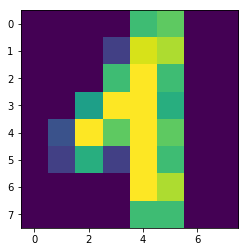

In [410]:
which = 200
print y_digits[which]
plt.imshow(X_digits[which].reshape(8,8))

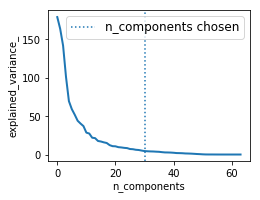

In [411]:

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = range(5,60,5)
# Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=[1]))
estimator.fit(X_digits, y_digits)




plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [412]:
estimator.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])>

In [413]:
estimator.cv_results_.keys()

['std_train_score',
 'rank_test_score',
 'mean_score_time',
 'param_pca__n_components',
 'std_test_score',
 'split1_train_score',
 'split0_test_score',
 'mean_test_score',
 'split2_train_score',
 'split0_train_score',
 'params',
 'std_fit_time',
 'std_score_time',
 'split2_test_score',
 'param_logistic__C',
 'mean_train_score',
 'mean_fit_time',
 'split1_test_score']

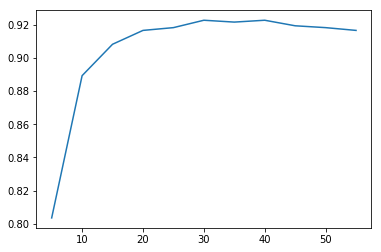

In [414]:
score = estimator.cv_results_['mean_test_score']
params = [estimator.cv_results_['params'][i].values() for i in range(len(estimator.cv_results_['params']))]
params = np.asarray(params)
# plt.scatter(params[:,0],params[:,1],s=score*100)
plt.plot(params[:,1],score)

# Dimensionality redcution and visualization
### Very very common in many data driven applications with the aim of "explain-ablity"

In [415]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_digits)
digits_trans = pca.transform(X_digits)

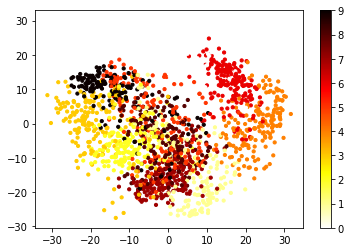

In [416]:
sc = plt.scatter(digits_trans[:,0],digits_trans[:,1],s=10,c=y_digits,cmap=plt.cm.hot_r, vmin=0, vmax=9)
plt.colorbar(sc)

## Later we will see that there are much better methods for this task
https://sevamoo.github.io/presentations_repo/15_Introduction_to_Representation_Learning_Convolutional_Neural_Nets_20170411.html

# Data Compression

#### Let's imagine an image is a matrix, where each row is a vector

(757, 523, 3)

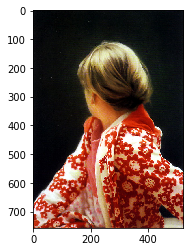

In [417]:
# Image compression
img = plt.imread('./Data/richter_betty.png')
plt.imshow(img)
img.shape

In [418]:
def PCA(Y):
    Y_mean = np.mean(Y,axis=0)
    Y = Y - Y_mean 
    # local centering
#     Y -= Y.mean(axis=1).reshape(Y.shape[0], -1)

    YTY = Y.T.dot(Y)
    
    VARs,PCs = np.linalg.eig(YTY)
    VARs = np.real(VARs)
    PCs = np.real(PCs)
    indsort = np.argsort(VARs*-1,)
    PCs = PCs[:,indsort]
    VARs = VARs[indsort]
    VARs = VARs/np.sum(VARs)
    return PCs,VARs

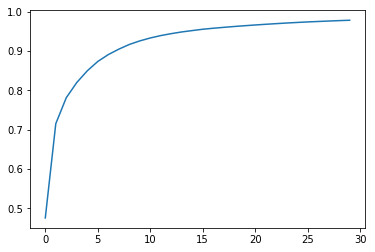

In [420]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]


PCs_R,VARs_R = PCA(R)
PCs_G,VARs_G = PCA(G)
PCs_B,VARs_B = PCA(B)


#Explained Variance
plt.plot(np.cumsum(VARs_R[:30]));

In [421]:


def recon_(n_comps=1):
    fig = plt.figure(figsize=(7,7))
    R_tran= R.dot(PCs_R[:,:n_comps])
    G_tran= G.dot(PCs_G[:,:n_comps])
    B_tran= B.dot(PCs_B[:,:n_comps])
    
    
    R_= R_tran.dot(PCs_R[:,:n_comps].T)
    G_= G_tran.dot(PCs_G[:,:n_comps].T)
    B_= B_tran.dot(PCs_B[:,:n_comps].T)
    
    
    mn = np.min(R_)
    mx = np.max(R_)
    R_ = (R_-mn)/(mx-mn)
    
    
    mn = np.min(G_)
    mx = np.max(G_)
    G_ = (G_-mn)/(mx-mn)
    
    mn = np.min(B_)
    mx = np.max(B_)
    B_ = (B_-mn)/(mx-mn)
    
    img_rec = np.concatenate((R_[:,:,np.newaxis],G_[:,:,np.newaxis],B_[:,:,np.newaxis]),axis=2)
    plt.imshow(img_rec)


interact(recon_, n_comps=(0,100,1))


interactive(children=(IntSlider(value=1, description=u'n_comps'), Output()), _dom_classes=('widget-interact',))

<function __main__.recon_>

# Generative applications of PCA

# PLaying in the  "latent space"


# How good is PCA in capturing the invariances?

In [422]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces

# Face data set
image_shape = (64, 64)
dataset = fetch_olivetti_faces()
faces = dataset.data[range(0,400,10)]
faces = dataset.data[:]
X = faces[:]
X.shape


(400, 4096)

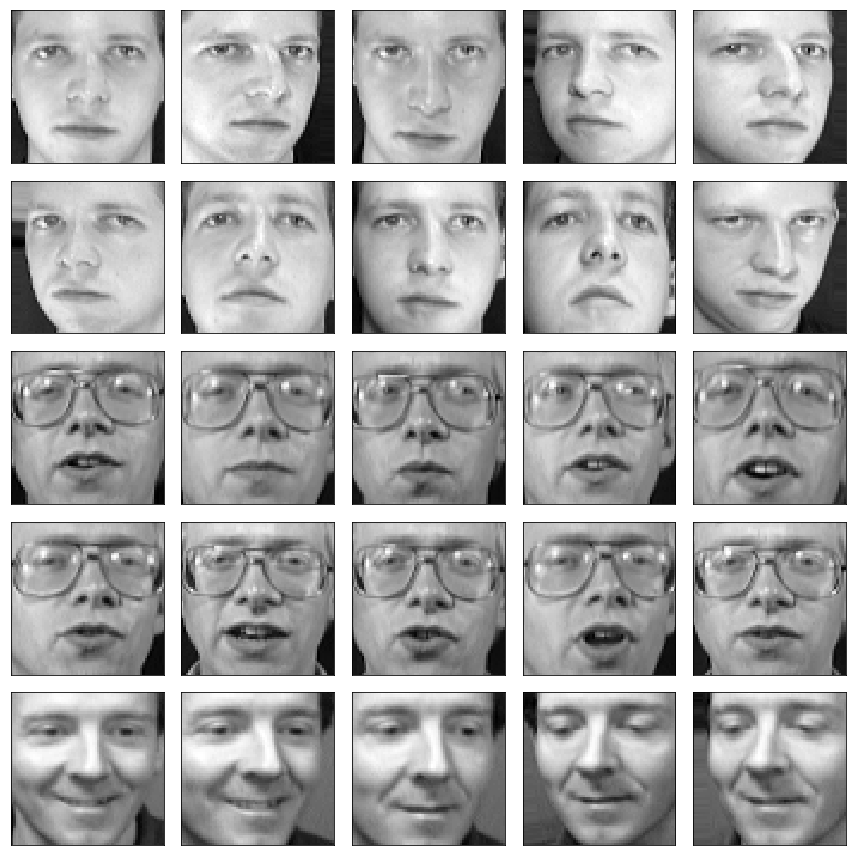

In [423]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(faces[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [424]:
PCs,VARs = PCA(X)

In [425]:
PCs.shape

(4096, 4096)

# Eigen Pictures

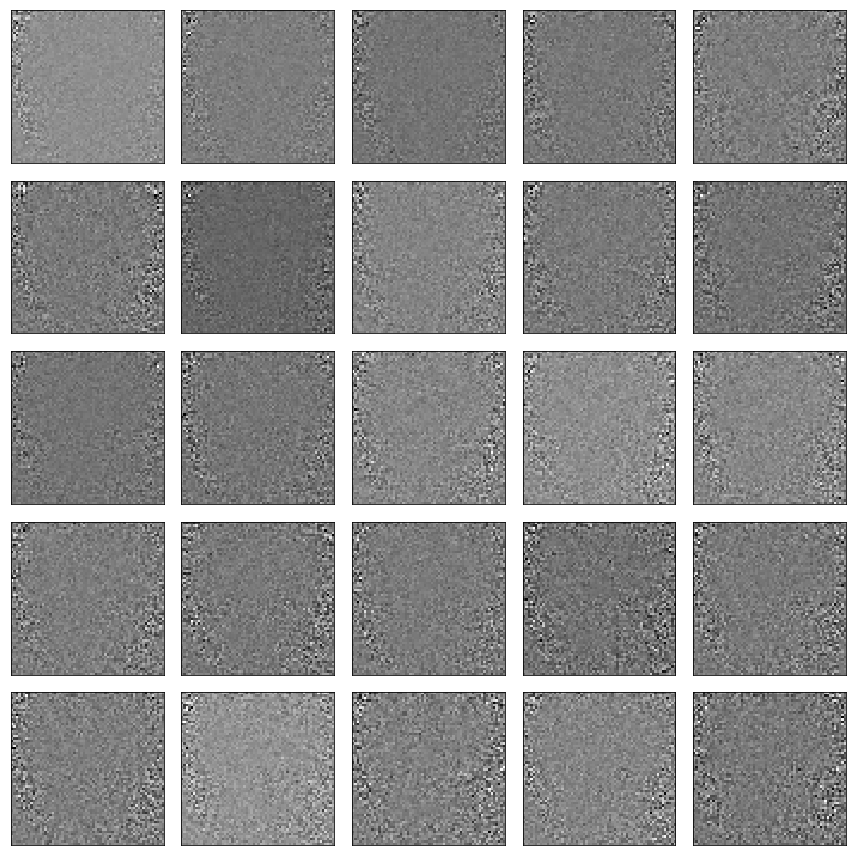

In [428]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(PCs[:,400+i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [429]:
# Each PC again should be orthogonal to all the other PCs
np.around(PCs[0].dot(PCs[11]),decimals=4)

0.0

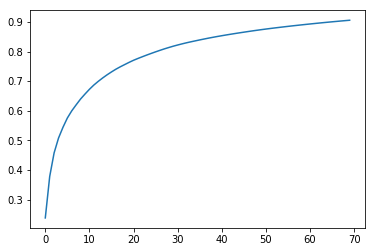

In [430]:
# Explained Variance
plt.plot(np.cumsum(VARs[:70]));

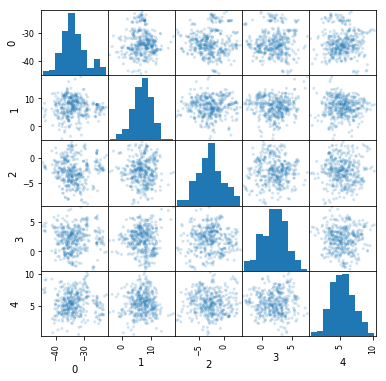

In [431]:
# look how independent they are 
X_trans = X.dot(PCs[:,:5])
DF = pd.DataFrame(data=X_trans)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

# Using PCA as a generative tool

In [432]:
def generate(p0=None,p1=None,p2=None,p3=None,p4=None,p5=None,p6=None,p7=None,p8=None,p9=None):
    fig = plt.figure(figsize=(7,7))
    x = np.asarray([p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]).T[np.newaxis,:]
    
    n_comps = x.shape[1]
#     X_trans = X.dot(PCs[:,:n_comps])
    x_ = x.dot(PCs[:,:n_comps].T)
#     X_ = x_ + X_mean
    plt.subplot(2,1,1)
    plt.imshow(x_.reshape(image_shape),cmap=plt.cm.Greys_r);
    plt.xticks([]);
    plt.yticks([]);

In [433]:
from ipywidgets import interact, HTML, FloatSlider
# interact(generate,a0=(a, b,.2));
interact(generate,p0=(-3,3,.1),p1=(-3,3,.1),p2=(-3,3,.1),p3=(-3,3,.1),p4=(-3,3,.1),
        p5=(-3,3,.1),p6=(-3,3,.1),p7=(-3,3,.1),p8=(-3,3,.1),p9=(-3,3,.1));

interactive(children=(FloatSlider(value=0.0, description=u'p0', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p1', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p2', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p3', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p4', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p5', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p6', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p7', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p8', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p9', max=3.0, min=-3.0), Output()), _dom_classes=('widget-interact',))

## Chairs

(696, 4096)


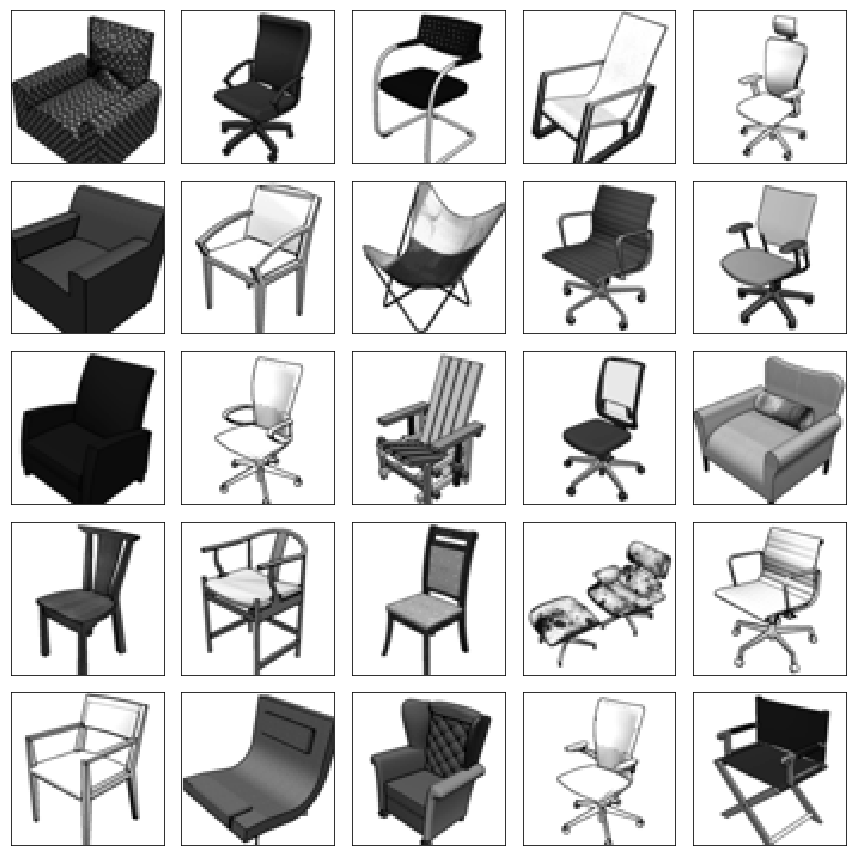

In [434]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces





#Chairs
path = "./Data/chairs.csv"
D = pd.read_csv(path,header=None)
image_shape = (64,64)
X = D.values[:]
print X.shape


# # Mnist data set
# image_shape = (28, 28)
# dataset = fetch_mldata('MNIST original')
# # faces = dataset.data
# X = faces[:]
# X.shape


fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()





In [435]:
PCs,VARs = PCA(X)

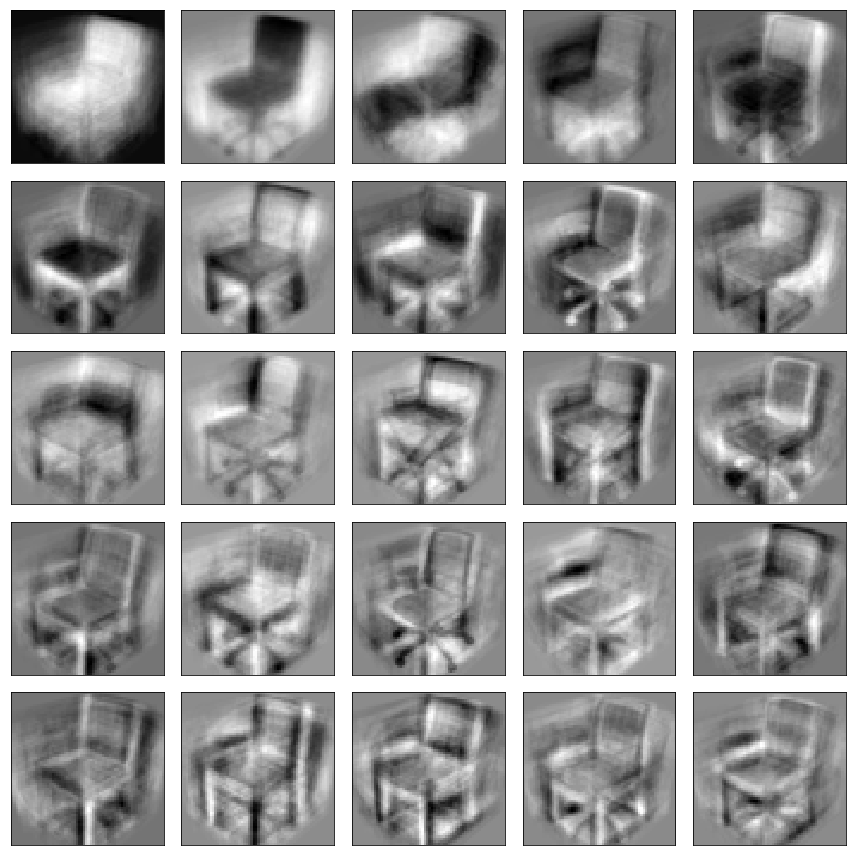

In [436]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(PCs[:,i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

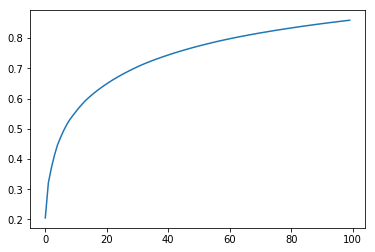

In [437]:
# Explained Variance
plt.plot(np.cumsum(VARs[:100]));

In [438]:
from ipywidgets import interact, HTML, FloatSlider
# interact(generate,a0=(a, b,.2));
interact(generate,p0=(-3,3,.1),p1=(-3,3,.1),p2=(-3,3,.1),p3=(-3,3,.1),p4=(-3,3,.1),
        p5=(-3,3,.1),p6=(-3,3,.1),p7=(-3,3,.1),p8=(-3,3,.1),p9=(-3,3,.1));

interactive(children=(FloatSlider(value=0.0, description=u'p0', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p1', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p2', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p3', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p4', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p5', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p6', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p7', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p8', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p9', max=3.0, min=-3.0), Output()), _dom_classes=('widget-interact',))

# Floor PLans
## Examples with non-Euclidean data

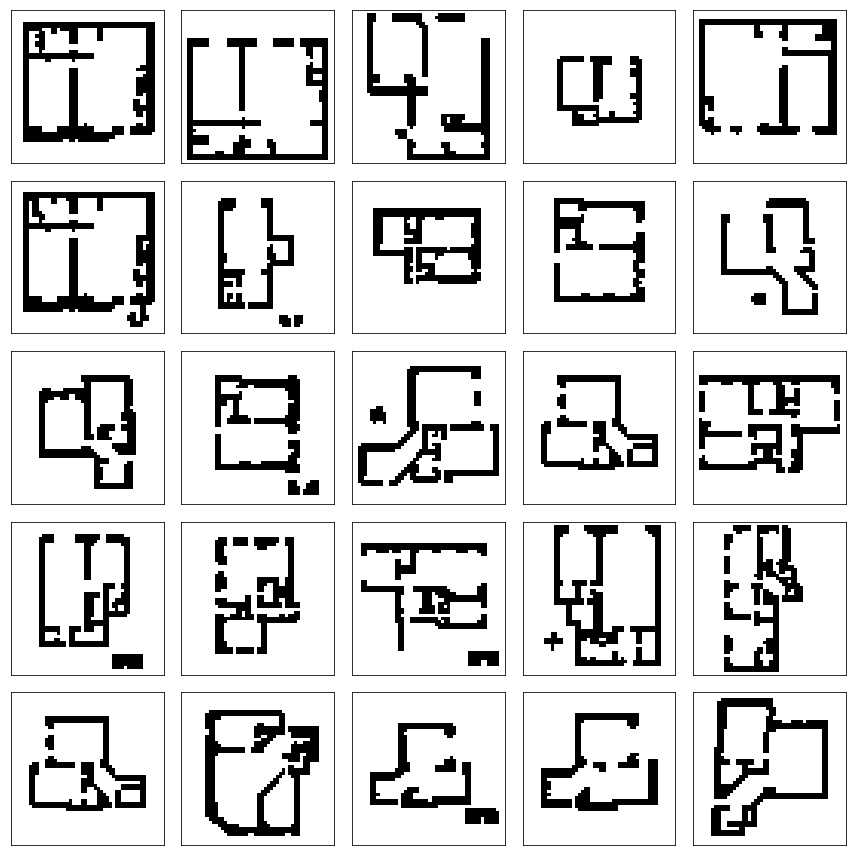

In [439]:
from sklearn.datasets import fetch_mldata


from sklearn.datasets import fetch_olivetti_faces





# floorplan
path =  "./Data/1000FloorPlans.csv"
D = pd.read_csv(path,header=None)
image_shape = (50, 50)
faces = D.values[:]
faces[faces>0] = -1
faces[faces==0] = 1
faces[faces==-1] = 0
X = faces[:]
X.shape


fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()


In [440]:
PCs,VARs = PCA(X)

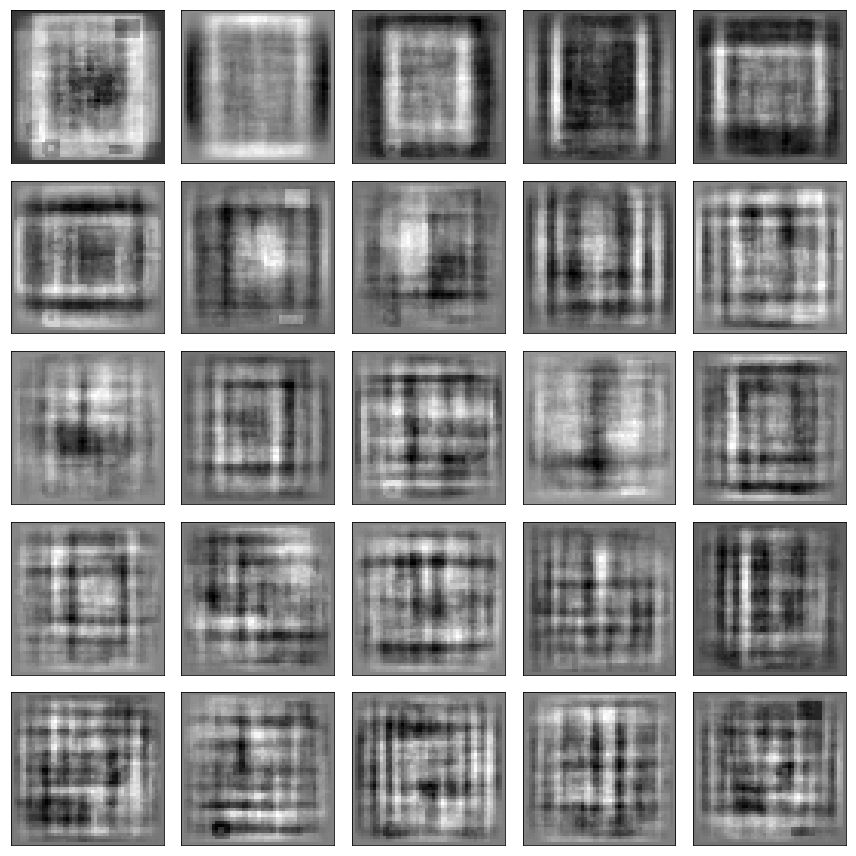

In [441]:
fig = plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(PCs[:,i].reshape(image_shape),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

In [442]:
from ipywidgets import interact, HTML, FloatSlider
# interact(generate,a0=(a, b,.2));
interact(generate,p0=(-3,3,.1),p1=(-3,3,.1),p2=(-3,3,.1),p3=(-3,3,.1),p4=(-3,3,.1),
        p5=(-3,3,.1),p6=(-3,3,.1),p7=(-3,3,.1),p8=(-3,3,.1),p9=(-3,3,.1));

interactive(children=(FloatSlider(value=0.0, description=u'p0', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p1', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p2', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p3', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p4', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p5', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p6', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p7', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p8', max=3.0, min=-3.0), FloatSlider(value=0.0, description=u'p9', max=3.0, min=-3.0), Output()), _dom_classes=('widget-interact',))

# Extensions to PCA

* **Independent CA (ICA)**
    * Where we relax the assumption of orthogonality of compenents
* **Kernel PCA**
    * Will be discussed with Support Vector Machines and Kernel Tricks
* **LDA** 
* **LSA**
* **Factor Analysis**
* **Ranom Projection**
* **Randomized pca**
* ** Stack of PCAs**
    * **Toward Deep networks of Autoencoders**
## Go here with all the extensions:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition